<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/A_10_0_0_CNN(Fashion_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.7730 - loss: 0.6343 - val_accuracy: 0.8755 - val_loss: 0.3472
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8847 - loss: 0.3229 - val_accuracy: 0.8898 - val_loss: 0.2976
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8986 - loss: 0.2725 - val_accuracy: 0.8992 - val_loss: 0.2790
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9144 - loss: 0.2324 - val_accuracy: 0.9082 - val_loss: 0.2591
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9202 - loss: 0.2066 - val_accuracy: 0.9087 - val_loss: 0.2586
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8985 - loss: 0.2822

✅ 테스트 정확도: 0.9006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━

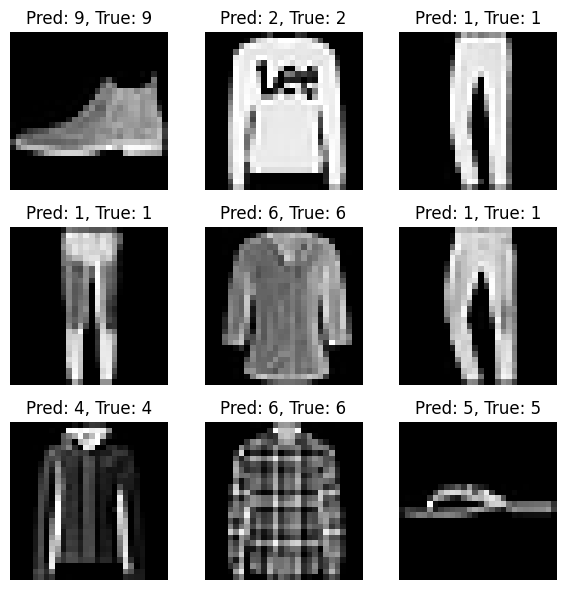

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. 데이터 로딩
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # 정규화 & 채널 차원 추가
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# 3. CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # (batch, 28, 28, 32)
    layers.MaxPooling2D((2, 2)),                                           # (batch, 14, 14, 32)
    layers.Conv2D(64, (3, 3), activation='relu'),                          # (batch, 12, 12, 64)
    layers.MaxPooling2D((2, 2)),                                           # (batch, 6, 6, 64)
    layers.Flatten(),                                                      # (batch, 6*6*64)
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10개 클래스 (output layer)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 학습
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 6. 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ 테스트 정확도: {test_acc:.4f}")

# 7. 예측 결과 시각화 (선택 사항)
plt.figure(figsize=(6, 6))
for i in range(9):
    img = x_test[i].reshape(28, 28)
    pred_label = model.predict(x_test[i:i+1]).argmax()
    true_label = y_test[i]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
